In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
a1=np.array([0.8147,0.9058,0.1270,0.9134])
v=np.fft.ifft(a1)

In [3]:
print(v)

[ 0.690225-0.j      0.171925-0.0019j -0.219375-0.j      0.171925+0.0019j]


In [4]:
def A(c,M,N):
    v=N*np.fft.ifft(c)
    y=v[0:M]
    return y

In [5]:
np.fft.fft(np.append(v,np.zeros(3)))

array([0.8147    +0.j        , 0.69067384+0.0019665j ,
       0.95347378-0.12677393j, 0.36131892-0.41243517j,
       0.35926296+0.41501328j, 0.96014946+0.12998877j,
       0.69199604-0.00775944j])

In [6]:
def AT(y,M,N):
    c=np.fft.fft(np.append(y,np.zeros(N-M)))
    return c

In [7]:
M=100
N=256
y=np.random.randn(M)
c=(1/N)*AT(y,M,N)
y2=A(c,M,N)

In [8]:
recon_err=y2-y
lm=np.amax(recon_err.real)
print('Maximum reconstruction error: %g', lm)

Maximum reconstruction error: %g 6.661338147750939e-16


In [9]:
M=100
m=np.arange(0,M)
f1=10.5

In [10]:
x=np.exp(2j*np.pi*f1/M*m)

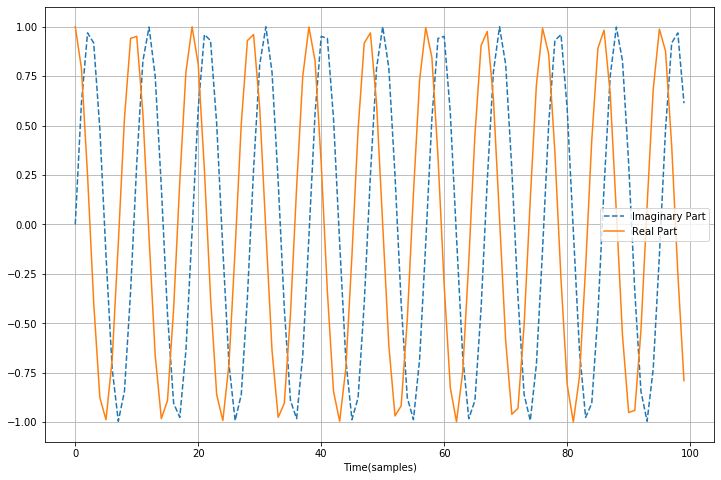

In [11]:
plt.figure(figsize=(12,8))
plt.grid()
plt.plot(m,x.imag,'--',label='Imaginary Part')
plt.plot(m,x.real,label='Real Part')
plt.xlabel('Time(samples)')
plt.legend()
plt.show()

In [12]:
X=np.fft.fft(x)

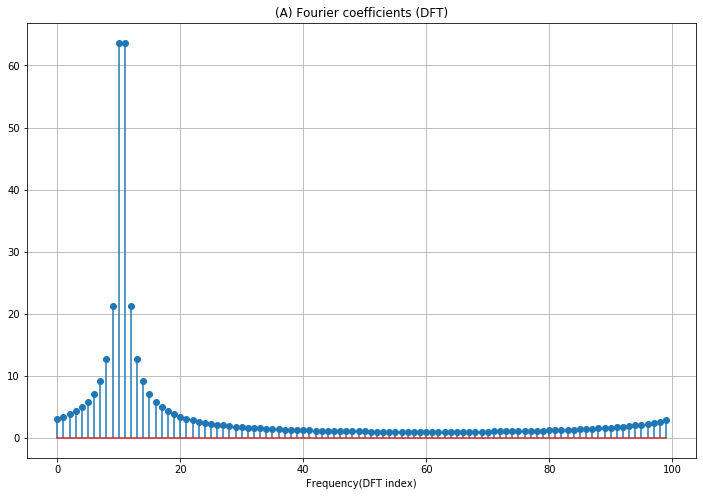

In [13]:
plt.figure(figsize=(12,8))
plt.grid()
plt.stem(m,np.abs(X),use_line_collection= True)
plt.xlabel('Frequency(DFT index)')
plt.title('(A) Fourier coefficients (DFT)')
plt.show()

In [14]:
N=256
X1=-(1/N)*AT(x,M,N)

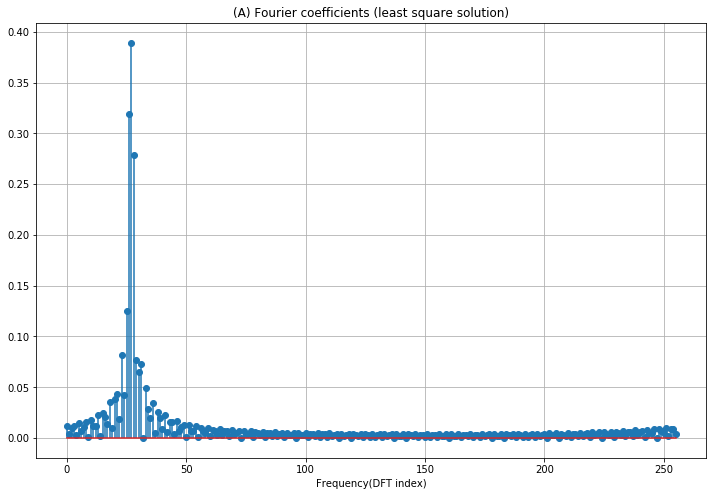

In [15]:
plt.figure(figsize=(12,8))
plt.grid()
plt.stem(np.abs(X1),use_line_collection= True)
plt.xlabel('Frequency(DFT index)')
plt.title('(A) Fourier coefficients (least square solution)')
plt.show()

In [16]:
def soft(x,lam):
    T=np.abs(x)-lam
    s=np.zeros((T.shape))
    for i in range(T.shape[0]):
        if T[i]>0:
            s[i]=np.sign(x[i])*T[i]
        else:
            s[i]=0
    return s

In [17]:
x1=np.arange(-5,5)
t=np.zeros((x1.shape))+2

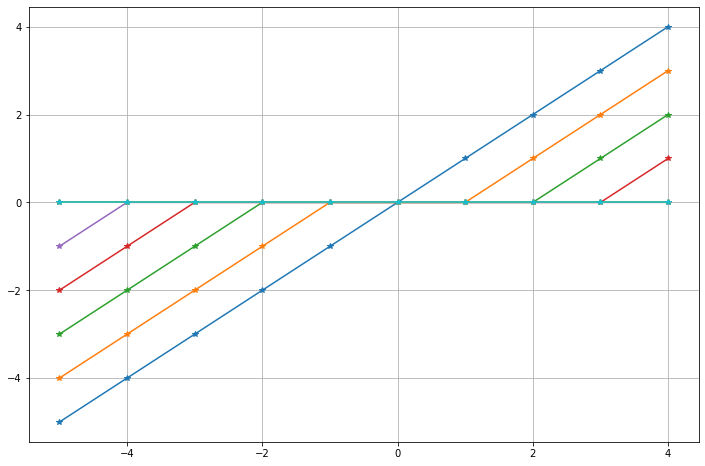

In [27]:
plt.figure(figsize=(12,8))
plt.grid()
for i in range(0,10):
    plt.plot(x1,soft(x1,i),'-*')

In [45]:
def bp_salsa(y,p,mu,ite,lam,M,N):
    x=AT(y,M,N)
    d=np.zeros((x.shape[0]),dtype=complex)
    cost=np.zeros((ite),dtype=complex)
    for i in range(ite):
        u=soft(x+d,0.5*lam/mu)-d
        d=(1/p)*AT(y-A(u,M,N),M,N)
        x=d+u
    return x

In [46]:
xx=bp_salsa(x,256,5,100,1,100,256)

C:\Users\Diego Barbosa\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


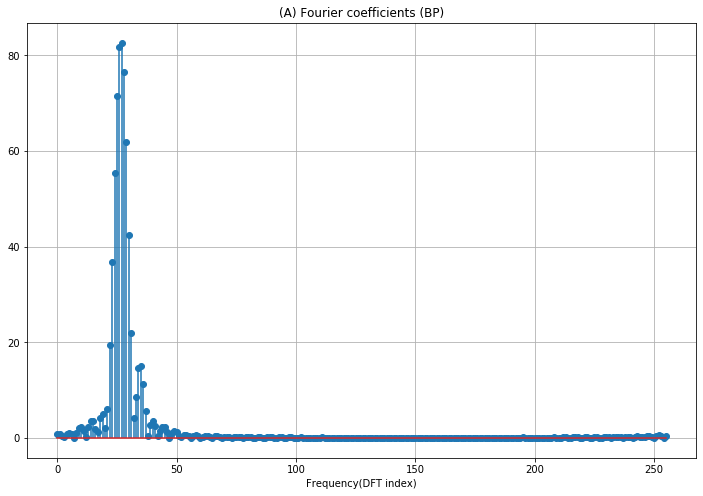

In [42]:
plt.figure(figsize=(12,8))
plt.grid()
plt.stem(np.abs(xx),use_line_collection= True)
plt.xlabel('Frequency(DFT index)')
plt.title('(A) Fourier coefficients (BP)')
plt.show()

In [51]:
xre=A(xx,100,256)
print(xre)

[ 1.00000000e+00+6.41847686e-17j  7.90155012e-01+6.12907054e-01j
  2.48689887e-01+9.68583161e-01j -3.97147891e-01+9.17754626e-01j
 -8.76306680e-01+4.81753674e-01j -9.87688341e-01-1.56434465e-01j
 -6.84547106e-01-7.28968627e-01j -9.41083133e-02-9.95561965e-01j
  5.35826795e-01-8.44327926e-01j  9.40880769e-01-3.38737920e-01j
  9.51056516e-01+3.09016994e-01j  5.62083378e-01+8.27080574e-01j
 -6.27905195e-02+9.98026728e-01j -6.61311865e-01+7.50111070e-01j
 -9.82287251e-01+1.87381315e-01j -8.91006524e-01-4.53990500e-01j
 -4.25779292e-01-9.04827052e-01j  2.18143241e-01-9.75916762e-01j
  7.70513243e-01-6.37423990e-01j  9.99506560e-01-3.14107591e-02j
  8.09016994e-01+5.87785252e-01j  2.78991106e-01+9.60293686e-01j
 -3.68124553e-01+9.29776486e-01j -8.60742027e-01+5.09041416e-01j
 -9.92114701e-01-1.25333234e-01j -7.07106781e-01-7.07106781e-01j
 -1.25333234e-01-9.92114701e-01j  5.09041416e-01-8.60742027e-01j
  9.29776486e-01-3.68124553e-01j  9.60293686e-01+2.78991106e-01j
  5.87785252e-01+8.090169

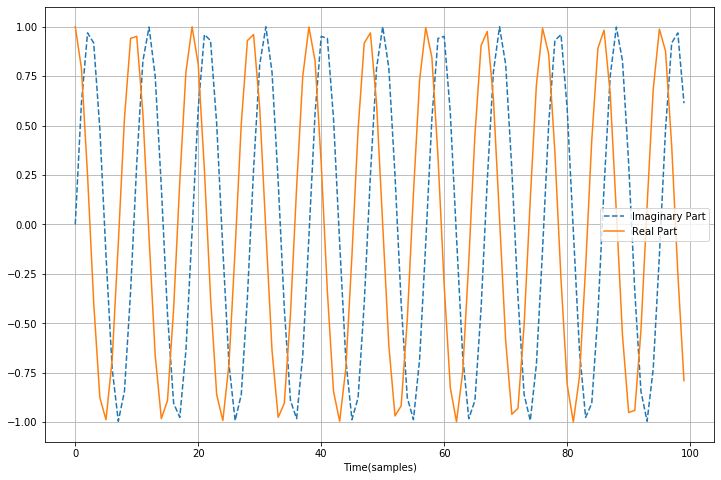

In [53]:
plt.figure(figsize=(12,8))
plt.grid()
plt.plot(m,xre.imag,'--',label='Imaginary Part')
plt.plot(m,xre.real,label='Real Part')
plt.xlabel('Time(samples)')
plt.legend()
plt.show()

In [56]:
err=x-xre
err_max=np.amax(err.real)

In [58]:
print('Maximum reconstruction error: %g', err_max)

Maximum reconstruction error: %g 1.1157741397482823e-13
